# Visualizing Dimensionality Reduction with Principal Component Analysis (PCA)

In this notebook, we will explore [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), a technique for dimensionality reduction in data analysis. Dimensionality reduction is helpful when dealing with high-dimensional datasets, as it allows to simplify the data, reduce computational cost, and make the visualization of data more manageable. PCA achieves this by transforming the original variables into a new set of variables, the principal components, which are orthogonal (uncorrelated), and which capture the maximum variance in the data.

The ability to reduce dimensions while preserving as much of the data's variability as possible makes PCA an helpful tool in fields such as machine learning, data mining, pattern recognition, and statistical modeling.

## Goals

Our goal in this notebook is to illustrate step-by-step how PCA works and to visualize its effects on a synthetic dataset.

- **Step 1:** Create an example dataset with 10 samples and 3 features, using a specified random seed for reproducibility
- **Step 2:** Visualize the example dataset with matplotlib to understand its original 3D structure
- **Step 3:** Calculate the principal components (PC1 and PC2) representing the main orientations of the data in the 3D space
- **Step 4:** Visualize the dataset along with the lines representing PC1 and PC2
- **Step 5:** Add a plane constructed from PC1 and PC2 lines to the 3D visualization
- **Step 6:** Calculate the projections of the 3D points onto the 2D plane formed by PC1 and PC2
- **Step 7:** Visualize the projections of the 3D points onto the 2D plane formed by PC1 and PC2
- **Step 8:** Rotate the 3D visualization to display the 2D-dimensionality reduction in 3D
- **Step 9:** Perform the dimensionality reduction to 2D using PCA and plot the result
- **Step 10:** Verify the correctness of the PCA dimensionality reduction process

## Interactive Visualization

The charts plotted in this notebook are static by default. For a more interactive exploration, enabling you to inspect the visualizations better, uncomment the magic command `%matplotlib widget`. This requires the `ipywidgets` package, which you can install using pip or conda if you haven't already.

In [6]:
# Uncomment the line below to enable interactive matplotlib visualizations
# %matplotlib widget

# Install ipywidgets if needed
# !pip install ipywidgets

## Step 1: Creating an Example Dataset

In this step, we will generate a synthetic dataset with 10 samples, each having 3 features. This dataset will serve as a basis for understanding PCA's ability to reduce dimensionality. We will use a random seed to ensure that our results are reproducible.

In [7]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(43)

# Generate a dataset with 10 samples and 3 features
data = np.random.rand(10, 3)  

print(data)

[[0.11505457 0.60906654 0.13339096]
 [0.24058962 0.32713906 0.85913749]
 [0.66609021 0.54116221 0.02901382]
 [0.7337483  0.39495002 0.80204712]
 [0.25442113 0.05688494 0.86664864]
 [0.221029   0.40498945 0.31609647]
 [0.0766627  0.84322469 0.84893915]
 [0.97146509 0.38537691 0.95448813]
 [0.44575836 0.66972465 0.08250005]
 [0.89709858 0.2980035  0.26230482]]


## Step 2: Visualizing the Example Dataset

Let's visualize the  dataset to understand its structure before we apply PCA. We will create a 3D scatter plot using matplotlib to observe the distribution of our synthetic data in three-dimensional space.

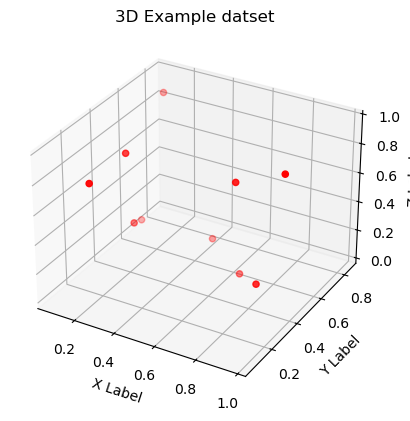

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is already defined and has shape 10x3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the dataset, adjusted for the conventional data orientation
# Here, data[:, 0] is all rows (samples) for the first feature,
# data[:, 1] is for the second feature, and data[:, 2] is for the third feature.
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Example datset')

plt.show()

## Step 3: Calculate the principal components (PC1 and PC2) representing the main orientations of the data in the 3D space

Let's move into the core of Principal Component Analysis (PCA) by calculating the principal components (PC1 and PC2) of our dataset.

### What are Principal Components?

Principal components are new, synthetic variables created from linear combinations of the original features in the dataset. These components capture the maximum variance present in the data, with each subsequent component capturing the maximum of the remaining variance under the constraint of being orthogonal to the previous components.

### Calculating Principal Components

1. **Center the Data:** The first step involves centering the data around the origin. This is achieved by subtracting the mean of each feature from all the samples. Centering is essential as PCA directions are sensitive to the scale of the data.

2. **Covariance Matrix:** Next, we calculate the covariance matrix of the mean-centered data. The covariance matrix captures the variance and covariance among the features, providing insight into the data's structure.

3. **Eigenvalues and Eigenvectors:** The eigenvalues and eigenvectors of the covariance matrix are then computed. Eigenvalues indicate the magnitude of the variance captured by each principal component, while the corresponding eigenvectors define their directions in the feature space.

4. **Sort and Select Principal Components:** The eigenvalues and their corresponding eigenvectors are sorted in descending order. The first two eigenvectors (corresponding to the two largest eigenvalues) are selected as the principal components PC1 and PC2. These components represent the directions in the 3D space along which the data varies the most.

By extracting these principal components, we essentially find the "main orientations" of the data. PC1 captures the direction of maximum variance, and PC2 captures the direction of the second highest variance, orthogonal to PC1. This process lays the groundwork for projecting the high-dimensional data onto a lower-dimensional space, facilitating visualization and analysis.

In [9]:
# Import numpy as it is required for calculations
import numpy as np

# Assuming 'data' has shape 10x3 (10 samples, 3 features)

# Center the data by subtracting the mean of each feature from all samples
mean_centered_data = data - np.mean(data, axis=0)

# Calculate the covariance matrix of the mean-centered data
# Note: We use 'rowvar=False' to treat rows as observations and columns as variables
cov_matrix = np.cov(mean_centered_data, rowvar=False)

# Calculate eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Principal components (first two eigenvectors)
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

print("PC1:", pc1)
print("PC2:", pc2)

PC1: [ 0.13795655 -0.27762241  0.95073329]
PC2: [-0.95483095  0.21779301  0.2021486 ]


# Step 4: Visualize the dataset including lines of PC1 and PC 2 via matplotlib

In this step, we transition from theory to visualization, bringing the abstract concepts of PCA into a more concrete and visual context. This step focuses on augmenting our 3D scatter plot of the dataset with visual representations of the first two principal components (PC1 and PC2). They represent the directions along which the data varies the most, providing insightful dimensions for analysis and interpretation.

### Visualizing Principal Components

1. **Calculating the Data Mean:** Even though we centered the data around its mean in the previous steps for PCA calculations, we recalculate the mean of the original dataset here to use as a reference point for plotting the principal component vectors. This is done to visually demonstrate how PC1 and PC2 emanate from the central point of the original dataset's distribution, providing context and a clearer understanding of their significance in relation to the data. This mean serves as the origin for our principal component vectors, grounding the abstract concepts of PCA in the tangible space of our 3D scatter plot.

2. **Scaling Principal Components:** Principal components are unit vectors that define directions. For visualization purposes, we scale these vectors. This does not change their direction but makes them visible on the plot.

3. **Plotting Principal Components:** We use the `quiver` function to draw vectors in 3D space. The vectors for PC1 and PC2 are drawn from the mean of the data, extending in their respective directions. The scaling factor and the `normalize` parameter ensure that these vectors are appropriately sized and visible on the plot.

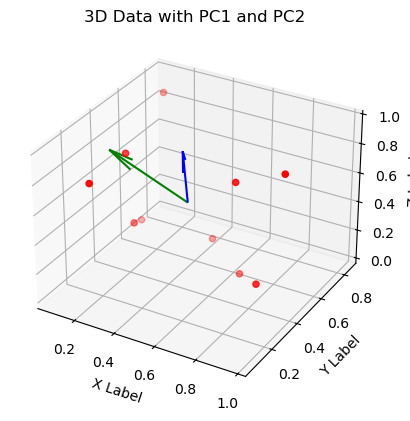

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  # Ensure numpy is imported if not already done

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data, adjusted to the new data structure
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

# Mean of the data across samples (rows)
data_mean = np.mean(data, axis=0)

# Scale the principal components for visualization
# Assuming 'pc1' and 'pc2' are defined from previous steps and are unit vectors
pc1_scaled = pc1 * 2  # Scale factor for visualization purposes
pc2_scaled = pc2 * 2  # Scale factor for visualization purposes

# Plotting PC1
# Origin is data_mean, direction is given by PC1 components, scaled for visibility
ax.quiver(data_mean[0], data_mean[1], data_mean[2], pc1_scaled[0], pc1_scaled[1], pc1_scaled[2], color='blue', length=0.5, normalize=True)

# Plotting PC2
# Origin is data_mean, direction is given by PC2 components, scaled for visibility
ax.quiver(data_mean[0], data_mean[1], data_mean[2], pc2_scaled[0], pc2_scaled[1], pc2_scaled[2], color='green', length=0.5, normalize=True)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Data with PC1 and PC2')

plt.show()


## Step 5: Add a plane constructed from PC1 and PC2 lines to the 3D visualization

This step creates a plane in the 3D visualization which is constructed from the to vectors PC1 and PC2. In the next steps, we will project the points onto this plane.

The plot is also slightly rotated to be able to better see the plane in 3D space. 

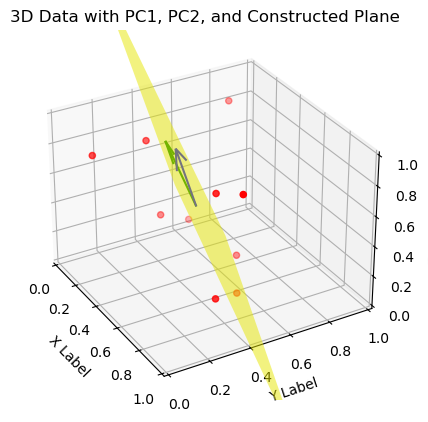

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

# Plot PC1 and PC2 from the data mean
ax.quiver(data_mean[0], data_mean[1], data_mean[2], pc1_scaled[0], pc1_scaled[1], pc1_scaled[2], color='blue', length=0.5, normalize=True)
ax.quiver(data_mean[0], data_mean[1], data_mean[2], pc2_scaled[0], pc2_scaled[1], pc2_scaled[2], color='green', length=0.5, normalize=True)

# Constructing a plane from PC1 and PC2
# Define a grid for the plane
x_range = np.linspace(-0.5, 0.5, 10)
y_range = np.linspace(-0.5, 0.5, 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
# Z grid is not needed as we are creating the plane in the PC1 and PC2 space

# Calculate points on the plane using the grid
# Each point is a combination of PC1 and PC2, scaled and shifted by the data mean
plane_x = data_mean[0] + pc1_scaled[0] * x_grid + pc2_scaled[0] * y_grid
plane_y = data_mean[1] + pc1_scaled[1] * x_grid + pc2_scaled[1] * y_grid
plane_z = data_mean[2] + pc1_scaled[2] * x_grid + pc2_scaled[2] * y_grid

# Plot the plane
ax.plot_surface(plane_x, plane_y, plane_z, alpha=0.5, rstride=100, cstride=100, color='yellow', edgecolor='none')

# Setting the axes limits to ensure the visualization is consistent
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Data with PC1, PC2, and Constructed Plane')

# Adjust the azimuthal angle by adding 90 degrees
elev_angle = 30
azim_angle = -30
roll_angle = 0

# Use the adjusted azimuthal angle for the view
ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

plt.show()

## Step 6: Calculate the projections of the 3D points to the 2D plane

Now we focus on translating the abstract concept of dimensionality reduction into a concrete calculation by projecting the original 3D points onto the 2D plane defined by the first two principal components, PC1 and PC2.

### Calculating the Projections

1. **Projection Coordinates:** First, we calculate the dot product of the mean-centered data with both PC1 and PC2. This operation transforms the original coordinates into the new basis formed by our principal components, effectively providing the coordinates of our data points in this reduced-dimensionality space.

2. **Reconstructing 2D Projections in 3D Space:** Although our primary goal is dimensionality reduction, for visualization purposes, we map these 2D projections back into the original 3D space. This step helps in visualizing the relationship between the original data points and their projections onto the 2D plane. It's important to note that while these reconstructed points are in 3D, they represent the positions of the original data on the plane spanned by PC1 and PC2.

3. **Visualization Preparation:** The result is a set of points (`proj_on_plane`) that lie on the plane defined by the principal components.

In [12]:
# Calculate the dot product of the mean-centered data with PC1 and PC2
# This will give the coordinates in the new basis defined by PC1 and PC2
pc1_coordinates = np.dot(mean_centered_data, pc1)
pc2_coordinates = np.dot(mean_centered_data, pc2)

# Construct the 2D projection points in the original 3D space for visualization
# This is mainly for the purpose of plotting and connecting the original points to their projections
# Note: These projections will not be strictly on the original 3D space but will be used to illustrate the concept
proj_on_plane = np.zeros((data.shape[0], 3))
for i in range(data.shape[0]):
    proj_on_plane[i] = data_mean + pc1_scaled * pc1_coordinates[i] + pc2_scaled * pc2_coordinates[i]

# The 'proj_on_plane' array now contains the 3D coordinates of the projections of the original data points
# onto the plane spanned by PC1 and PC2. These will be visualized in Step 7.


## Step 7: Visualize the projections of the 3D points onto the 2D plane formed by PC1 and PC2

This step visualizes the previous calculations. The original data points (the red dots) are projected onto the plane constructed by PC1 and PC2. The projected points (the green dots) are on the plane. A dotted line links each pair of red and green dot to visualize the path of the projection. 

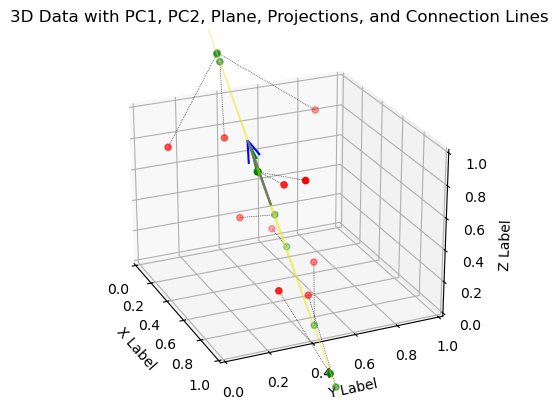

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

# Assuming 'data_mean', 'pc1', 'pc2' are already defined and projections calculated
# Plot PC1 and PC2 from the data mean
scale = 2
pc1_scaled = pc1 * scale
pc2_scaled = pc2 * scale
ax.quiver(data_mean[0], data_mean[1], data_mean[2], pc1_scaled[0], pc1_scaled[1], pc1_scaled[2], color='blue', length=0.5, normalize=True)
ax.quiver(data_mean[0], data_mean[1], data_mean[2], pc2_scaled[0], pc2_scaled[1], pc2_scaled[2], color='green', length=0.5, normalize=True)

# Plot the plane (reuse the plane plotting code from the previous cells)
plane_x = data_mean[0] + pc1_scaled[0] * x_grid + pc2_scaled[0] * y_grid
plane_y = data_mean[1] + pc1_scaled[1] * x_grid + pc2_scaled[1] * y_grid
plane_z = data_mean[2] + pc1_scaled[2] * x_grid + pc2_scaled[2] * y_grid
ax.plot_surface(plane_x, plane_y, plane_z, alpha=0.5, rstride=100, cstride=100, color='yellow', edgecolor='none')

# Plot the projections as scatter points on the plane
ax.scatter(proj_on_plane[:, 0], proj_on_plane[:, 1], proj_on_plane[:, 2], c='g', marker='o')

# Plot dotted lines connecting original points to their projections
for i in range(data.shape[0]):
    ax.plot([data[i, 0], proj_on_plane[i, 0]], [data[i, 1], proj_on_plane[i, 1]], [data[i, 2], proj_on_plane[i, 2]], 'k:', linewidth=0.5)

# Setting the axes limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Data with PC1, PC2, Plane, Projections, and Connection Lines')

# Adjust the azimuthal angle by adding 90 degrees
elev_angle = 24
azim_angle = -24
roll_angle = 0

# Use the adjusted azimuthal angle for the view
ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

plt.show()


### Step 7.1: Visualize projected points on the 2D plane formed by PC1 and PC2

Before we move on, let's look at the data again from another angle. Now the plot just contains the projected points.

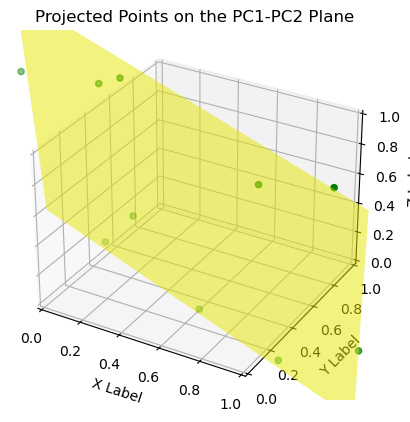

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the plane (reuse the plane plotting code from previous cells)
# Assuming 'data_mean', 'pc1', 'pc2', and 'scale' are already defined
plane_x = data_mean[0] + pc1_scaled[0] * x_grid + pc2_scaled[0] * y_grid
plane_y = data_mean[1] + pc1_scaled[1] * x_grid + pc2_scaled[1] * y_grid
plane_z = data_mean[2] + pc1_scaled[2] * x_grid + pc2_scaled[2] * y_grid
ax.plot_surface(plane_x, plane_y, plane_z, alpha=0.5, rstride=100, cstride=100, color='yellow', edgecolor='none')

# Plot the projections as green dots on the plane
ax.scatter(proj_on_plane[:, 0], proj_on_plane[:, 1], proj_on_plane[:, 2], c='g', marker='o')

# Setting the axes limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Projected Points on the PC1-PC2 Plane')

# Adjust the azimuthal angle by adding 90 degrees
elev_angle = 30
azim_angle = -60
roll_angle = 0

# Use the adjusted azimuthal angle for the view
ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

plt.show()

## Step 8: Rotate the 3D visualization to display the 2D-dimensionality reduction in 3D

The plot displayed in this step is essentially the same as the shown in step 7.1, but it is rotated differently. The orientation is a way that we look onto the plane and the projected points as if they were in 2D space - yet they are still in 3D space. The point is doing this is to have a visual proof that this looks like the next step in which we will create a 2D plot of the data reduced to 2D.

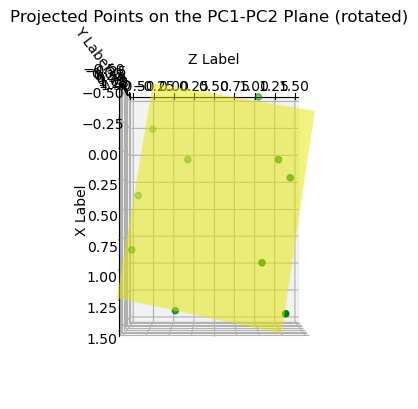

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
plane_x = data_mean[0] + pc1_scaled[0] * x_grid + pc2_scaled[0] * y_grid
plane_y = data_mean[1] + pc1_scaled[1] * x_grid + pc2_scaled[1] * y_grid
plane_z = data_mean[2] + pc1_scaled[2] * x_grid + pc2_scaled[2] * y_grid
ax.plot_surface(plane_x, plane_y, plane_z, alpha=0.5, rstride=100, cstride=100, color='yellow', edgecolor='none')

# Plot the projections as green dots on the plane
ax.scatter(proj_on_plane[:, 0], proj_on_plane[:, 1], proj_on_plane[:, 2], c='g', marker='o')

# Setting the axes limits
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_zlim([-0.5, 1.5])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Projected Points on the PC1-PC2 Plane (rotated)')

# Adjust the azimuthal angle by adding 90 degrees
azim_angle = -90
elev_angle = 0
roll_angle = -90

# Use the adjusted azimuthal angle for the view
ax.view_init(elev=elev_angle, azim=azim_angle, roll=roll_angle)

plt.show()


## Step 9: Perform the dimensionality reduction to 2D using PCA and plot the result

Finally, we reach the step in our exploration of PCA—actual dimensionality reduction in which we reduce the dimensionality. This step translates the theoretical foundation laid by PCA into a tangible result, illustrating how high-dimensional data can be simplified for analysis or visualization while retaining its essential characteristics.

Here are the final calculations for dimensionality reduction:

1. **Recentering the Data:** Although the data was mean-centered earlier in the process, this step reiterates the importance of centering the data around zero before performing PCA. This ensures that the projection onto the principal components is accurate.

2. **Arranging Principal Components:** The principal components (PC1 and PC2) are arranged side by side in a matrix. This matrix acts as a transformation tool, aligning the data along the new axes defined by the principal components. The shape of this matrix (3, 2) reflects the transition from 3D to 2D space.

3. **Projecting the Data:** By multiplying the mean-centered data by the matrix of principal components, we project the original data onto the 2D plane defined by PC1 and PC2. The resulting `projections_2D` array represents the coordinates of each data point in this new, simplified space.

The 2D-visualization matches what we have seen in step 8 in 3D. Additionally, let's remind ourselves why we reduced the dimensionality: The dimensional reduction provides insights into the data's underlying structure. By plotting these points in the space defined by the principal components, we can observe patterns, clusters, or relationships that were not apparent in the higher-dimensional space.

We have simplified the data to reduce computational cost (for more complex use cases) and make the visualization of data more manageable. At the same time we preserved as much of the data's variability as possible to reduce noise and not to filter out essential information.

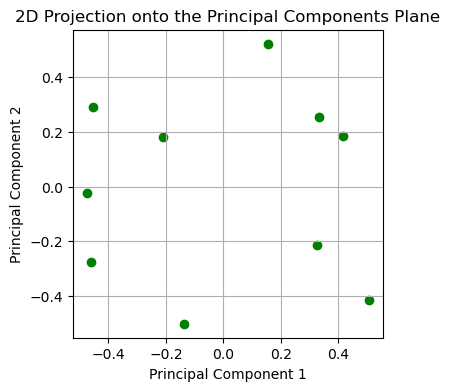

In [18]:
# Recalculate mean-centered data with correct shape (10, 3)
mean_centered_data = data - np.mean(data, axis=0)

# Ensure PC1 and PC2 are arranged as columns in a matrix for projection
# This matrix should have shape (3, 2), where 3 is the number of dimensions and 2 is the number of PCs
PCs = np.column_stack((pc1, pc2))

# Project the mean-centered data onto the principal components
# The result, projections_2D, will have shape (10, 2), corresponding to the new 2D coordinates for each observation
projections_2D = np.dot(mean_centered_data, PCs)

# Now, plot the 2D projections
plt.figure(figsize=(4, 4))
plt.scatter(projections_2D[:, 0], projections_2D[:, 1], c='g', marker='o', label='Projected Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection onto the Principal Components Plane')
#plt.legend()
plt.grid(True)
plt.show()



# Step 10: Verify the correctness of the PCA dimensionality reduction process

Before closing this notebook, let's verify the correctness of the calculation on another path. We have optically seen the transformation, but let's compare the calculated result to calling the PCA method of sklearn.

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

In [13]:
data_2d

array([[-0.45444551,  0.28820212],
       [ 0.33113365,  0.25364417],
       [-0.45880959, -0.27383255],
       [ 0.32606455, -0.21401098],
       [ 0.41521149,  0.18309633],
       [-0.20946506,  0.17950155],
       [ 0.15554601,  0.52050493],
       [ 0.50644759, -0.41225955],
       [-0.47404649, -0.02464071],
       [-0.13763665, -0.50020531]])

In [14]:
projections_2D

array([[-0.45444551,  0.28820212],
       [ 0.33113365,  0.25364417],
       [-0.45880959, -0.27383255],
       [ 0.32606455, -0.21401098],
       [ 0.41521149,  0.18309633],
       [-0.20946506,  0.17950155],
       [ 0.15554601,  0.52050493],
       [ 0.50644759, -0.41225955],
       [-0.47404649, -0.02464071],
       [-0.13763665, -0.50020531]])

Let's compare the 2 results. They look identical:

In [15]:
projections_2D == data_2d

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

There seems to be some rounding issues, even though the 2 arrays look identical, let's check if they are at least close:

In [16]:
import numpy as np

# Assuming projections_2D and data_2d are your two arrays to compare
are_close = np.allclose(projections_2D, data_2d)

print(are_close)

True


This is proof enough for me. 